In [80]:
import numpy as np
import pandas as pd
import pickle
from sklearn.metrics.pairwise import cosine_similarity
tfidf_vectorizer = TfidfVectorizer()
import numpy as np
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
from sklearn.metrics.pairwise import cosine_similarity
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
import matplotlib.pyplot as plt

In [81]:
import os
import cv2
import numpy as np
import requests
from PIL import Image
from io import BytesIO
import pandas as pd

def download_images_from_dataset(dataset_path, output_directory):

    df = pd.read_csv(dataset_path)


    preprocessed_output_directory = os.path.join(output_directory, 'preprocessed_final')
    os.makedirs(preprocessed_output_directory, exist_ok=True)


    for index, row in df.iterrows():
        product_id = row['Index']
        image_urls = eval(row['Image'])


        image_urls = [url for url in image_urls if url != 'not found']

        if len(image_urls) == 0:
            print(f"No valid image URLs found for product {product_id}. Removing this row.")
            df.drop(index, inplace=True)
            continue


        product_directory = os.path.join(preprocessed_output_directory, str(product_id))
        os.makedirs(product_directory, exist_ok=True)

        for i, url in enumerate(image_urls):
            try:

                response = requests.get(url)
                if response.status_code == 200:

                    image = cv2.imdecode(np.frombuffer(response.content, np.uint8), -1)
                    image = preprocess_image(image)

                    cv2.imwrite(os.path.join(product_directory, f'image_{i}.jpg'), image)
                    print(f"Image {i} for product {product_id} downloaded and preprocessed successfully.")
                else:
                    print(f"Failed to download image {i} for product {product_id}. Status code: {response.status_code}")
            except Exception as e:
                print(f"Error downloading image {i} for product {product_id}: {e}")


    df.to_csv(dataset_path, index=False)


dataset_path = '/content/drive/MyDrive/IR_A2_dataset/A2_Data.csv'
output_directory = '/content/drive/MyDrive/IR_A2_dataset'
download_images_from_dataset(dataset_path, output_directory)


Error downloading image 0 for product 3452: name 'preprocess_image' is not defined
Error downloading image 0 for product 1205: name 'preprocess_image' is not defined
Error downloading image 1 for product 1205: name 'preprocess_image' is not defined
Error downloading image 2 for product 1205: name 'preprocess_image' is not defined
Error downloading image 0 for product 1708: name 'preprocess_image' is not defined
Error downloading image 0 for product 2078: name 'preprocess_image' is not defined
Error downloading image 0 for product 801: name 'preprocess_image' is not defined
Error downloading image 0 for product 126: name 'preprocess_image' is not defined
Error downloading image 1 for product 126: name 'preprocess_image' is not defined
Error downloading image 2 for product 126: name 'preprocess_image' is not defined
Error downloading image 3 for product 126: name 'preprocess_image' is not defined
Error downloading image 0 for product 1329: name 'preprocess_image' is not defined
Error dow

KeyboardInterrupt: 

Q1(b)

In [82]:
import numpy as np
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import os
import pickle
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

csv_file_path = "/content/drive/MyDrive/IR_A2_dataset/A2_Data.csv"
df = pd.read_csv(csv_file_path)

output_parent_directory = "normalized_features"

normalized_features_dict = {}

for index, row in df.iterrows():
    image_links = row['Image']
    if isinstance(image_links, str):
        image_links = image_links.strip('][').split(', ')
        for link in image_links:
            try:
                response = requests.get(link.strip("'"))
                if response.status_code == 200:
                    image = Image.open(BytesIO(response.content))
                    model = VGG16(weights='imagenet', include_top=False, pooling='avg')
                    image = image.resize((224, 224))
                    image = np.expand_dims(image, axis=0)
                    image = preprocess_input(image)
                    features = model.predict(image)
                    image_features = features.flatten()
                    normalized_features = (image_features - image_features.mean()) / image_features.std()
                    normalized_features_dict[link.strip("'")] = normalized_features
            except Exception as e:
                print(f"Error processing image from {link}: {e}")

output_file = os.path.join(output_parent_directory, "final_features.pickle")
with open(output_file, 'wb') as f:
    pickle.dump(normalized_features_dict, f)


1/1 [==============================] - 1s 627ms/step


KeyboardInterrupt: 

In [83]:
with open("final_features.pkl", 'wb') as f:
    pickle.dump(normalized_features_dict, f)

In [4]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

df = pd.read_csv('/content/drive/MyDrive/IR_A2_dataset/A2_Data.csv')

preprocessed_data = {}

def preprocess_text(text):
    soup_obj = BeautifulSoup(text, 'html.parser')
    text = soup_obj.get_text()

    text = text.lower()

    tokens = word_tokenize(text)
    tokens = [word.strip(string.punctuation) for word in tokens if word.strip(string.punctuation)]

    tokens = [word for word in tokens if not re.match(r'\d', word)]

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:

def calculate_tf_idf(documents):

    tf = []
    for document in documents:
        term_frequency = {}
        token_counts = Counter(document)
        for token, count in token_counts.items():
            term_frequency[token] = count / len(document)
        tf.append(term_frequency)

    # Calculate document frequency (DF)
    document_frequency = Counter()
    for document in documents:
        unique_tokens = set(document)
        document_frequency.update(unique_tokens)

    # Calculate inverse document frequency (IDF)
    idf = {}
    total_documents = len(documents)
    for token, count in document_frequency.items():
        idf[token] = math.log(total_documents / count)

    # Calculate TF-IDF scores
    tf_idf = []
    for term_frequency_doc in tf:
        tf_idf_doc = {}
        for token, tf_value in term_frequency_doc.items():
            tf_idf_doc[token] = tf_value * idf[token]
        tf_idf.append(tf_idf_doc)

    return tf_idf

# Preprocess text
preprocessed_documents = []
for review in df['Review Text']:
    preprocessed_review = preprocess_text(review)
    preprocessed_documents.append(preprocessed_review)

tf_idf_scores = calculate_tf_idf(preprocessed_documents)

product_tf_idf_dict = {}

for i, scores in enumerate(tf_idf_scores):
    product_id = df.loc[i, 'Index']
    product_tf_idf_dict[product_id] = scores

output_dir = "/content/drive/MyDrive/IR_A2_dataset/tf-idf"

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

output_file_pickle = os.path.join(output_dir, 'tf_idf_scores_2.pkl')
output_file_text = os.path.join(output_dir, 'tf_idf_scores_2.txt')

with open(output_file_pickle, 'wb') as f_pickle:
    pickle.dump(product_tf_idf_dict, f_pickle)

pickle_data_str = ""
with open(output_file_pickle, 'rb') as f_pickle:
    pickle_data_str = str(f_pickle.read())

with open(output_file_text, 'w') as f_text:
    f_text.write(pickle_data_str)

if not os.path.exists(output_dir):
    os.makedirs(output_dir)

with open(output_file_text, 'w') as f_text:
    for product_id, scores in product_tf_idf_dict.items():
        f_text.write(f"Product ID: {product_id}\n")
        for token, score in scores.items():
            f_text.write(f"{token}: {score}\n")
        f_text.write("\n")

with open(output_file_pickle, 'rb') as f_pickle:
    loaded_tfidf = pickle.load(f_pickle)

print("The Tf-idf scores are saved and loaded from pickle file")

In [ ]:
import pickle

save_path = "/content/drive/MyDrive/IR_A2_dataset/final_normalized.pkl"

with open(save_path, 'rb') as f:
    ff = pickle.load(f)

tf_idf_path = "/content/drive/MyDrive/IR_A2_dataset/tf-idf/tf_idf_scores.pkl"

with open(tf_idf_path, 'rb') as f:
    tfidf = pickle.load(f)

3(a)

In [84]:
csv_path = "/content/drive/MyDrive/IR_A2_dataset/A2_Data.csv"
features_dict_path = "/content/drive/MyDrive/IR_A2_dataset/final_normalized.pickle"
output_file_path = "/content/drive/MyDrive/IR_A2_dataset/q3_a_results.txt"
csv_file_path = "/content/drive/MyDrive/IR_A2_dataset/A2_Data.csv"

In [85]:

popo = pd.read_csv(csv_path)
popo['Image'] = popo['Image'].apply(lambda x: x.strip("[]").replace("'", "").split(', '))
popo = popo.explode('Image')


with open(features_dict_path, 'rb') as f:
    features_dict = pickle.load(f)

def get_input_features(input_image_url, features_dict):
    if input_image_url in features_dict:
        return features_dict[input_image_url]
    else:
        print("Input URL not found in the precomputed features dictionary.")
        return None


In [86]:
input_image_url = input("Enter the URL of the image: ")
input_text = input("Enter the review text: ")

input_features = get_input_features(input_image_url, features_dict)
if input_features is None:
    exit()

print("\nComparing input URL with the following URLs from the CSV:")

sim_scoress = []

input_image_url_stripped = input_image_url.strip("[]").replace("'", "")

for url, target_features in features_dict.items():
    url_stripped = url.strip("[]").replace("'", "")
    input_feature = [input_features]
    target_feature = [target_features]
    ss_score = cosine_similarity(input_feature, target_feature)[0][0]
    sim_scoress.append((url_stripped, ss_score))

sim_scoress.sort(key=lambda x: x[1], reverse=True)

print("\nTop 3 similar URLs:")
for i in range(min(3, len(sim_scoress))):
    url, score = sim_scoress[i]
    print(f"URL: {url}, Similarity Score: {score}")


Enter the URL of the image: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg
Enter the review text: I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break.

Comparing input URL with the following URLs from the CSV:

Top 3 similar URLs:
URL: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg, Similarity Score: 1.0
URL: https://images-na.ssl-images-amazon.com/images/I/719-SDMiOoL._SY88.jpg, Similarity Score: 0.7386159896850586
URL: https://images-na.ssl-images-amazon.com/images/I/711kGbkdzEL._SY88.jpg, Similarity Score: 0.6478695273399353


In [87]:
ids_with_nan_reviews = popo[popo['Review Text'].isnull()].index
print(ids_with_nan_reviews)


Int64Index([828], dtype='int64')


In [89]:
top_3_urls = [url for url, _ in sim_scoress[:3]]
top_3_similarity_scores = [score for _, score in sim_scoress[:3]]

top_3_review_texts = [popo[popo['Image'] == url].iloc[0]['Review Text'] if not popo[popo['Image'] == url].empty else "No review text found" for url in top_3_urls]

import pandas as pd

popo['Review Text'].fillna('', inplace=True)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def fit_transform_tfidf(review_texts):
    tfidf_vectorizer = TfidfVectorizer()
    text_features = tfidf_vectorizer.fit_transform(review_texts)
    return tfidf_vectorizer, text_features

def transform_input_text(input_text, tfidf_vectorizer):
    input_text_features = tfidf_vectorizer.transform([input_text])
    return input_text_features

def calculate_similarity(input_text_features, top_texts_features):
    similarity_scores = cosine_similarity(input_text_features, top_texts_features)[0]
    return similarity_scores

tfidf_vectorizer, text_features = fit_transform_tfidf(popo['Review Text'])

# Then transform the input text
input_text_features = transform_input_text(input_review_text, tfidf_vectorizer)

# Transform top 3 review texts
top_3_text_features = tfidf_vectorizer.transform(top_3_review_texts)

# Calculate similarity scores
text_similarity_scores = calculate_similarity(input_text_features, top_3_text_features)

# Print results
print("\nCorresponding review texts and Scores: ")
for text, score in zip(top_3_review_texts, text_similarity_scores):
    print(f"review Text: {text}, cosine similarity score: {score}")




Corresponding review texts and Scores: 
review Text: I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break., cosine similarity score: 1.0
review Text: These locking tuners look great and keep tune.  Good quality materials and construction.  Excellent upgrade to any guitar.  I had to drill additions holes for installation.  If your neck already comes with pre-drilled holes, then they should drop right in, otherwise you will need to buy a guitar tuner pin drill jig, also available from Amazon., cosine similarity score: 0.09694063189150576
review Text: Had to drill into my headstock. Needs 2 holes per tree because of the mounting peg. Use a ruler and a 1/16 drillbit and you'll be fine. I recommend installing with the strings on so you can set them properly., cosine similarity score: 0.023202953993436082


In [90]:
import numpy as np

def write_output_to_file(output_file_path, top_3_urls, top_3_review_texts, text_similarity_scores):
    with open(output_file_path, 'w') as f:
        for url, review_text, similarity_score in zip(top_3_urls, top_3_review_texts, text_similarity_scores):
            f.write("URL: {}\n".format(url))
            f.write("Review Text: {}\n".format(review_text))
            f.write("Similarity Score: {}\n".format(similarity_score))
            f.write("\n")

    print(f"\ntop image-text pairs saved to {output_file_path}")

def print_output_matrix(top_3_urls, top_3_similarity_scores, top_3_review_texts, text_similarity_scores):
    output_matrix = np.array([
        [url, sim_score, review_text, text_sim_score]
        for url, sim_score, review_text, text_sim_score
        in zip(top_3_urls, top_3_similarity_scores, top_3_review_texts, text_similarity_scores)], dtype=object)

    # Print the output matrix
    for row in output_matrix:
        print("URL:", row[0])
        print("Similarity Score:", row[1])
        print("Review Text:", row[2])
        print("Text Similarity Score:", row[3])
        print()

# Assuming top_3_urls, top_3_review_texts, text_similarity_scores are already defined

output_file_path = "output.txt"

# Call the functions
write_output_to_file(output_file_path, top_3_urls, top_3_review_texts, text_similarity_scores)
print_output_matrix(top_3_urls, top_3_similarity_scores, top_3_review_texts, text_similarity_scores)


output_pickle_file_path = "Q3_a.pickle"

import pickle
with open(output_pickle_file_path, 'wb') as f:
    pickle.dump(output_matrix, f)

print(f"\nOutput saved to {output_pickle_file_path} as a pickle file.")



top image-text pairs saved to output.txt
URL: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg
Similarity Score: 1.0
Review Text: I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break.
Text Similarity Score: 1.0

URL: https://images-na.ssl-images-amazon.com/images/I/719-SDMiOoL._SY88.jpg
Similarity Score: 0.738616
Review Text: These locking tuners look great and keep tune.  Good quality materials and construction.  Excellent upgrade to any guitar.  I had to drill additions holes for installation.  If your neck already comes with pre-drilled holes, then they should drop right in, otherwise you will need to buy a guitar tuner pin drill jig, also available from Amazon.
Text Similarity Score: 0.09694063189150576

URL: https://images-na.ssl-images-amazon.com/images/I/711kGbkdzEL._SY88.jpg
Similarity Score: 0.6478695
Review Text: Had to drill into m

3(b)

Enter the URL of the image: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg
Enter the review text: I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break.
1/1 [==============================] - 1s 616ms/step


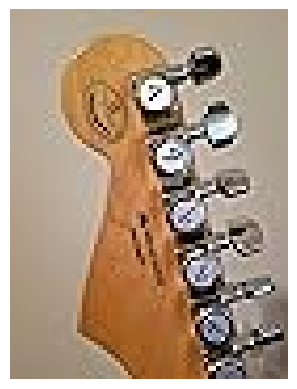

1/1 [==============================] - 0s 498ms/step
Review Text: I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break.
Review Similarity Score: 1.0
Image URL: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg
Image Similarity Score: 0.9999999



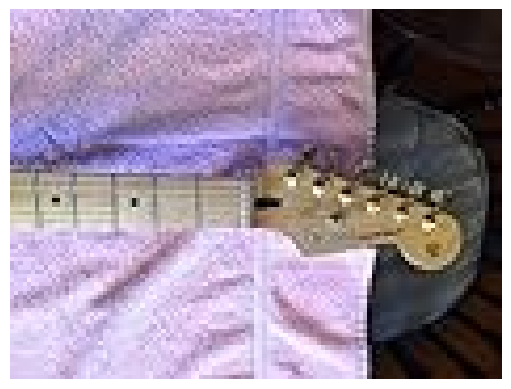

1/1 [==============================] - 0s 496ms/step
Review Text: I went from fender chrome non-locking to fender gold locking. It made my guitar look beautiful and play beautiful. I think locking tuners are the way to go. If you are new to locking tuners look on YouTube for instructions.
Review Similarity Score: 0.30316601726909753
Image URL: https://images-na.ssl-images-amazon.com/images/I/61DvLcapd8L._SY88.jpg
Image Similarity Score: 0.17228964



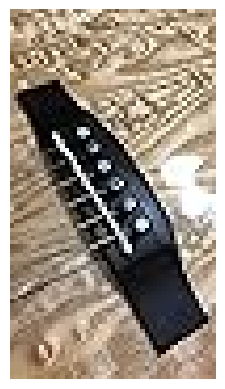

1/1 [==============================] - 0s 487ms/step
Review Text: Just out these beauty's on my Mitchell and they are perfect. I wanted to add character to my guitar and this definitely helps.
Review Similarity Score: 0.14996940865985417
Image URL: https://images-na.ssl-images-amazon.com/images/I/71e7ns5jvJL._SY88.jpg
Image Similarity Score: 0.2500558



In [91]:



df = pd.read_csv(csv_file_path)

input_image_url = input("Enter the URL of the image: ")
input_text = input("Enter the review text: ")


try:
    response = requests.get(input_image_url)
    if response.status_code == 200:
        input_image = Image.open(BytesIO(response.content))
    else:
        print("Failed input")
        input_image = None
except Exception as e:
    print(f"Error: {e}")
    input_image = None

if input_image is not None:
    model = VGG16(weights='imagenet', include_top=False, pooling='avg')
    input_image = input_image.resize((224, 224))
    input_image = np.expand_dims(input_image, axis=0)
    input_image = preprocess_input(input_image)
    input_features = model.predict(input_image).flatten()
    input_features = (input_features - input_features.mean()) / input_features.std()

    df['Review Text'].fillna('', inplace=True)
    tfidf_vectorizer = TfidfVectorizer()
    text_features = tfidf_vectorizer.fit_transform(df['Review Text'])
    inp_feat = tfidf_vectorizer.transform([input_text])

    same_text = [cosine_similarity(inp_feat, text_features[i])[0][0] for i in range(len(df))]

    ranked_3 = np.argsort(same_text)[::-1][:3]
    output_matrix = []

    counter = 0

    for index in ranked_3:
        review_text = df.loc[index, 'Review Text']
        review_similarity_score = same_text[index]

        image_links = [link.strip().strip("[]").strip("'") for link in df.loc[index, 'Image'].split(',')]
        for link in image_links:
            try:
                response = requests.get(link)
                if response.status_code == 200:
                    tgt_imgi = Image.open(BytesIO(response.content))
                else:
                    print("Failed image.")
                    continue
            except Exception as e:
                print(f"image download error {link}: {e}")
                continue

            if tgt_imgi:
                tgt_imgi_array = np.array(tgt_imgi)

                # Display the image
                plt.imshow(tgt_imgi_array)
                plt.axis('off')
                plt.show()

                tgt_imgi = tgt_imgi.resize((224, 224))
                tgt_imgi = np.expand_dims(tgt_imgi, axis=0)
                tgt_imgi = preprocess_input(tgt_imgi)
                target_features = model.predict(tgt_imgi).flatten()
                target_features = (target_features - target_features.mean()) / target_features.std()
                similarity_score = cosine_similarity(input_features.reshape(1, -1), target_features.reshape(1, -1))[0][0]
                output_matrix.append([review_text, review_similarity_score, link, similarity_score])

                print("Review Text:", review_text)
                print("Review Similarity Score:", review_similarity_score)
                print("Image URL:", link)
                print("Image Similarity Score:", similarity_score)
                print()

                counter += 1

                if counter == 3:
                    break
            else:
                print("Failed to download the image.")




In [92]:
    output_pickle_file_path = "Q3_b.pickle"

    with open(output_pickle_file_path, 'wb') as f:
        pickle.dump(output_matrix, f)

    print(f"Output saved to {output_pickle_file_path} as a pickle file.")

Output saved to Q3_b.pickle as a pickle file.


Q4

In [93]:
import pickle
import numpy as np

def load_matrices(file_path_a, file_path_b):
    with open(file_path_a, 'rb') as f:
        matrix_a = pickle.load(f)

    with open(file_path_b, 'rb') as f:
        matrix_b = pickle.load(f)

    return matrix_a, matrix_b

def combine_matrices(matrix_a, matrix_b):
    matter = np.vstack((matrix_a, matrix_b))
    return matter

def swap_columns(matrix):
    matrix[3:, [0, 2]] = matrix[3:, [2, 0]]
    matrix[3:, [1, 3]] = matrix[3:, [3, 1]]
    return matrix

def calculate_average(matrix):
    avg_val = (matrix[:, 1].astype(float) + matrix[:, 3].astype(float)) / 2
    matrix = np.insert(matrix, 4, avg_val, axis=1)
    return matrix

def sort_matrix(matrix):
    sorted_indices = np.argsort(matrix[:, 4])[::-1]
    sorted_matrix = matrix[sorted_indices]
    return sorted_matrix

def print_results(sorted_matrix):
    for index, row in enumerate(sorted_matrix, start=1):
        url = row[0]
        url_similarity = row[1]
        review_text = row[2]
        review_similarity = row[3]
        composite_score = row[4]

        print(f"Order: {index}")
        print(f"URL: {url}")
        print(f"Similarity with Input URL: {url_similarity}")
        print(f"Review Text: {review_text}")
        print(f"Similarity with Input Review Text: {review_similarity}")
        print(f"Composite Score: {composite_score}\n")

if __name__ == "__main__":
    pickle_file_path_a = "output_results_a.pickle"
    pickle_file_path_b = "Q3_b.pickle"

    matrix_a, matrix_b = load_matrices(pickle_file_path_a, pickle_file_path_b)
    master_matrix = combine_matrices(matrix_a, matrix_b)
    master_matrix = swap_columns(master_matrix)
    master_matrix = calculate_average(master_matrix)
    sorted_matrix = sort_matrix(master_matrix)
    print_results(sorted_matrix)


Order: 1
URL: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg
Similarity with Input URL: 1.0
Review Text: I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break.
Similarity with Input Review Text: 1.0
Composite Score: 1.0

Order: 2
URL: https://images-na.ssl-images-amazon.com/images/I/71bztfqdg+L._SY88.jpg
Similarity with Input URL: 0.9999999
Review Text: I have been using Fender locking tuners for about five years on various strats and teles. Definitely helps with tuning stability and way faster to restring if there is a break.
Similarity with Input Review Text: 1.0
Composite Score: 0.9999999500000001

Order: 3
URL: https://images-na.ssl-images-amazon.com/images/I/719-SDMiOoL._SY88.jpg
Similarity with Input URL: 0.7386159896850586
Review Text: These locking tuners look great and keep tune.  Good quality materials and construction.  Excellent u